In [0]:
from keras.datasets import mnist
from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential,Model
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import math

Using TensorFlow backend.


In [0]:
(X_train,_),(_,_)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
print(X_train.shape)

(60000, 28, 28)


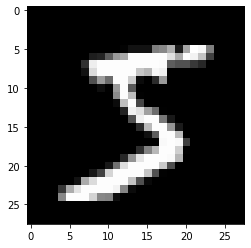

In [0]:
# lets visualise this:
plt.imshow(X_train[0],cmap='gray')
plt.show()

In [0]:
# Normalize this data [-1,1]
X_train=(X_train.astype('float32')-127.5)/127.5
print(np.min(X_train))
print(np.max(X_train))
print(X_train.shape)

-1.0
1.0
(60000, 28, 28)


In [0]:
TOTAL_EPOCHS=50
BATCH_SIZE=256
NO_OF_BATCHES=int(X_train.shape[0]/BATCH_SIZE)
HALF_BATCH=128
NOISE_DIM=100 # upsample into 784 dim vector
adam=Adam(lr=2e-4,beta_1=0.5) # they are best parameter for GAN

In [0]:
# generator : input noise is 100 and output dim is 784
import warnings
warnings.filterwarnings('ignore')
generator=Sequential()
generator.add(Dense(256,input_shape=(NOISE_DIM,)))
generator.add(LeakyReLU(0.2))
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))
generator.add(Dense(784,activation='tanh'))
generator.compile(loss='binary_crossentropy',optimizer='adam')
generator.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 1024)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 784)              

In [0]:
discriminator=Sequential()
discriminator.add(Dense(512,input_shape=(784,)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(1,activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy',optimizer=adam)
discriminator.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________


In [0]:
# GAN
discriminator.trainable=False
gan_input=Input(shape=(NOISE_DIM,))
generated_img=generator(gan_input)
gan_output=discriminator(generated_img)

# functional API
model=Model(gan_input,gan_output)
model.compile(loss='binary_crossentropy',optimizer=adam)

In [0]:
import os
os.mkdir('images')
def save_imgs(epoch,samples=100):
    
    noise = np.random.normal(0,1,size=(samples,100))
    generated_imgs = generator.predict(noise)
    generated_imgs = generated_imgs.reshape(samples,28,28)
    
    plt.figure(figsize=(10,10))
    for i in range(samples):
        plt.subplot(10,10,i+1)
        plt.imshow(generated_imgs[i],interpolation='nearest',cmap='gray')
        plt.axis("off")
        
    plt.tight_layout()
    plt.savefig('images/gan_output_epoch_{0}.png'.format(epoch+1))
    plt.show()

Epoch 1 Discriminator loss 0.6602  Generator loss 1.0049
Epoch 2 Discriminator loss 0.6612  Generator loss 1.0046
Epoch 3 Discriminator loss 0.6611  Generator loss 1.0082
Epoch 4 Discriminator loss 0.6610  Generator loss 1.0045
Epoch 5 Discriminator loss 0.6606  Generator loss 1.0058
Epoch 6 Discriminator loss 0.6597  Generator loss 1.0114
Epoch 7 Discriminator loss 0.6608  Generator loss 1.0092
Epoch 8 Discriminator loss 0.6605  Generator loss 1.0117
Epoch 9 Discriminator loss 0.6602  Generator loss 1.0109
Epoch 10 Discriminator loss 0.6611  Generator loss 1.0155


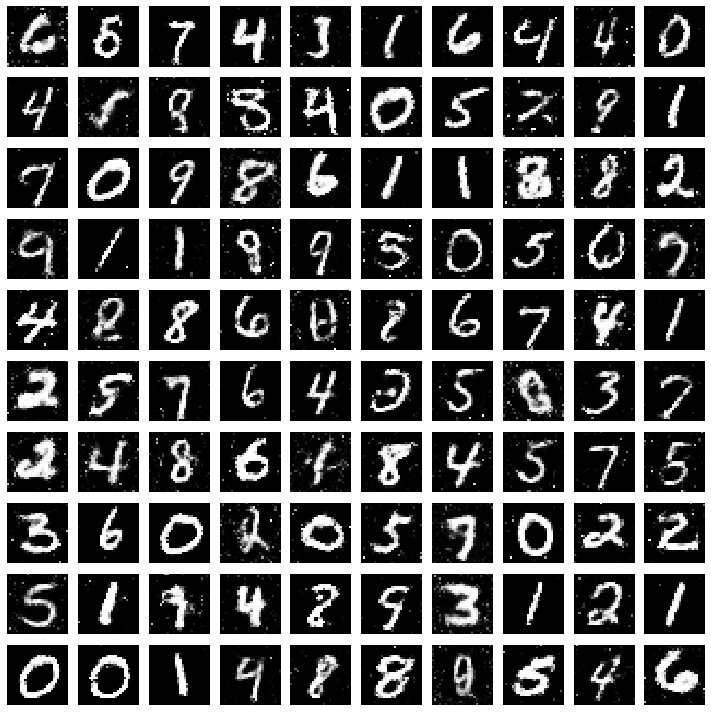

Epoch 11 Discriminator loss 0.6592  Generator loss 1.0106
Epoch 12 Discriminator loss 0.6596  Generator loss 1.0171
Epoch 13 Discriminator loss 0.6584  Generator loss 1.0140
Epoch 14 Discriminator loss 0.6590  Generator loss 1.0139
Epoch 15 Discriminator loss 0.6591  Generator loss 1.0195
Epoch 16 Discriminator loss 0.6579  Generator loss 1.0154
Epoch 17 Discriminator loss 0.6579  Generator loss 1.0167
Epoch 18 Discriminator loss 0.6572  Generator loss 1.0185
Epoch 19 Discriminator loss 0.6582  Generator loss 1.0100
Epoch 20 Discriminator loss 0.6570  Generator loss 1.0199


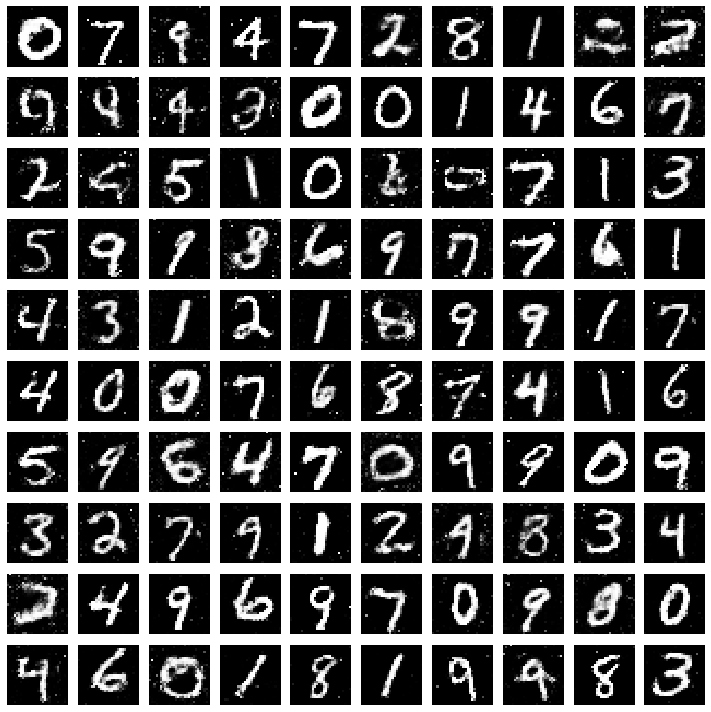

Epoch 21 Discriminator loss 0.6581  Generator loss 1.0173
Epoch 22 Discriminator loss 0.6565  Generator loss 1.0212
Epoch 23 Discriminator loss 0.6567  Generator loss 1.0240
Epoch 24 Discriminator loss 0.6569  Generator loss 1.0186
Epoch 25 Discriminator loss 0.6560  Generator loss 1.0190
Epoch 26 Discriminator loss 0.6560  Generator loss 1.0231
Epoch 27 Discriminator loss 0.6558  Generator loss 1.0226
Epoch 28 Discriminator loss 0.6559  Generator loss 1.0256
Epoch 29 Discriminator loss 0.6551  Generator loss 1.0220
Epoch 30 Discriminator loss 0.6551  Generator loss 1.0227


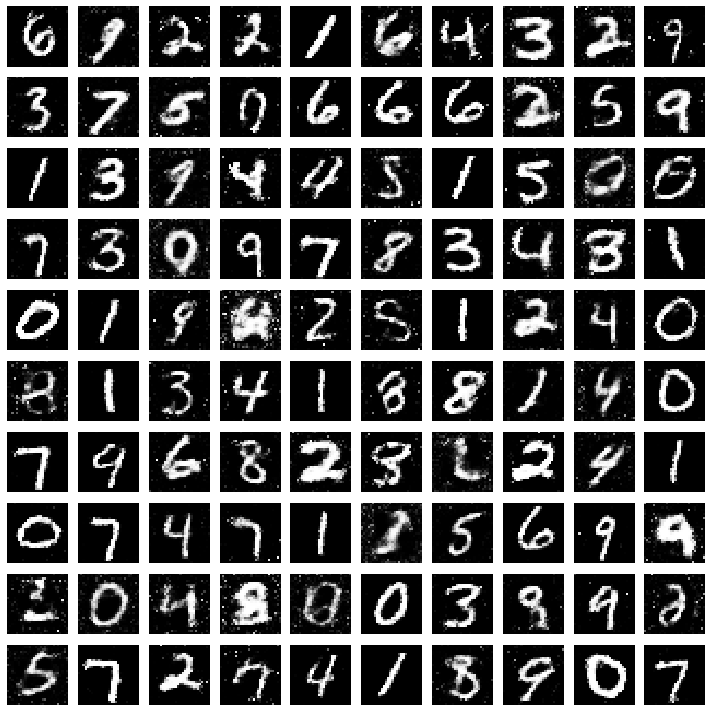

Epoch 31 Discriminator loss 0.6564  Generator loss 1.0262
Epoch 32 Discriminator loss 0.6546  Generator loss 1.0278
Epoch 33 Discriminator loss 0.6547  Generator loss 1.0229
Epoch 34 Discriminator loss 0.6560  Generator loss 1.0278
Epoch 35 Discriminator loss 0.6549  Generator loss 1.0284
Epoch 36 Discriminator loss 0.6552  Generator loss 1.0246
Epoch 37 Discriminator loss 0.6545  Generator loss 1.0278
Epoch 38 Discriminator loss 0.6528  Generator loss 1.0359
Epoch 39 Discriminator loss 0.6542  Generator loss 1.0362
Epoch 40 Discriminator loss 0.6530  Generator loss 1.0295


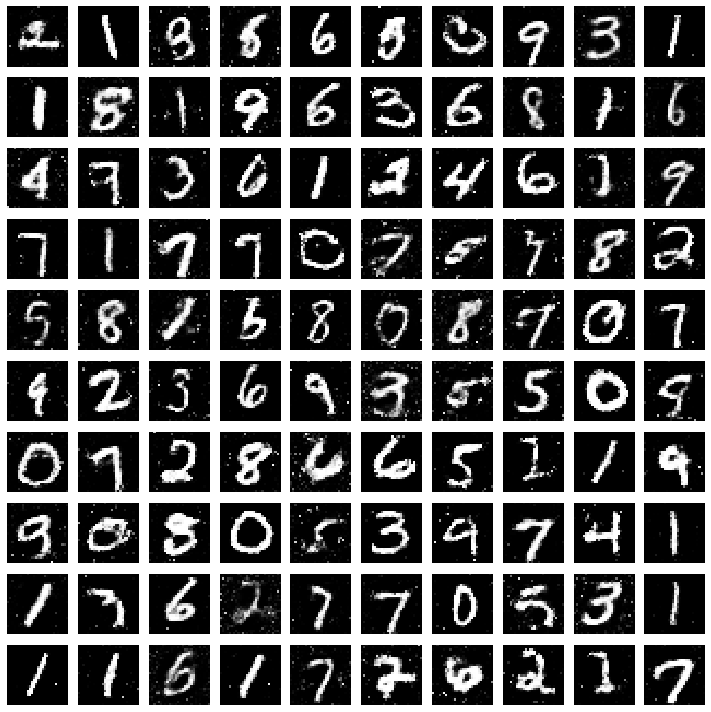

Epoch 41 Discriminator loss 0.6537  Generator loss 1.0332
Epoch 42 Discriminator loss 0.6533  Generator loss 1.0374
Epoch 43 Discriminator loss 0.6534  Generator loss 1.0280
Epoch 44 Discriminator loss 0.6532  Generator loss 1.0328
Epoch 45 Discriminator loss 0.6523  Generator loss 1.0316
Epoch 46 Discriminator loss 0.6526  Generator loss 1.0377
Epoch 47 Discriminator loss 0.6530  Generator loss 1.0321
Epoch 48 Discriminator loss 0.6521  Generator loss 1.0380
Epoch 49 Discriminator loss 0.6517  Generator loss 1.0355
Epoch 50 Discriminator loss 0.6505  Generator loss 1.0393


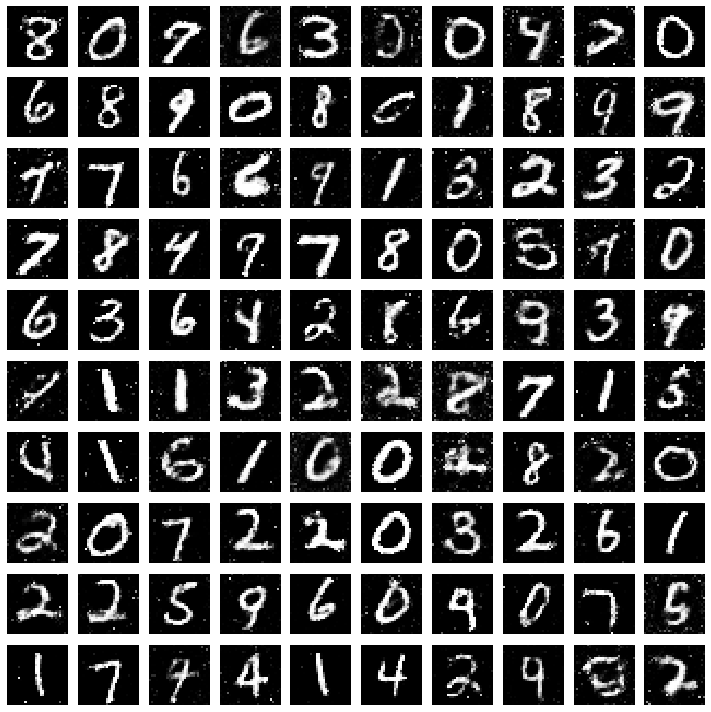

In [0]:
X_train=X_train.reshape((-1,784))
d_losses=[]
g_losses=[]
# Training loop
for epoch in range(TOTAL_EPOCHS):
  epoch_d_loss=0
  epoch_g_loss=0
  # mini_batch SGD
  for step in range(NO_OF_BATCHES):
    # step 1: Discriminator
    # Real data+Fake data
    # real data X
    idx=np.random.randint(0,X_train.shape[0],HALF_BATCH)
    real_imgs=X_train[idx]
    # fake imgs X
    noise=np.random.normal(0,1,size=(HALF_BATCH,NOISE_DIM))
    fake_imgs=generator.predict(noise) # forward pass of the noise to give u some fake images.
    # to train our discriminator, we need X as well as Y values
    # labels
    real_y=np.ones((HALF_BATCH,1))*0.9
    fake_y=np.zeros((HALF_BATCH,1))
    # Train our discriminator
    d_loss_real=discriminator.train_on_batch(real_imgs,real_y)
    d_loss_fake=discriminator.train_on_batch(fake_imgs,fake_y)
    d_loss=0.5*d_loss_real+0.5*d_loss_fake

    epoch_d_loss+=d_loss
    # Train Generator(Considering frozen discriminator)
    noise=np.random.normal(0,1,size=(BATCH_SIZE,NOISE_DIM))
    ground_truth_y=np.ones((BATCH_SIZE,1))
    g_loss=model.train_on_batch(noise,ground_truth_y)
    epoch_g_loss+=g_loss
    d_losses.append(epoch_d_loss/NO_OF_BATCHES)
    g_losses.append(epoch_g_loss/NO_OF_BATCHES)
  print("Epoch %d Discriminator loss %.4f  Generator loss %.4f"%(epoch+1,epoch_d_loss/NO_OF_BATCHES,epoch_g_loss/NO_OF_BATCHES))
  if (epoch+1)%10==0:
        #generator.save('model/gan_generator_{0}.h5'.format(epoch+1))
        save_imgs(epoch)

In [0]:
!ls

images	images.zip  sample_data


In [0]:
for f in os.listdir('images'):
  print(f)

gan_output_epoch_10.png
gan_output_epoch_30.png
gan_output_epoch_40.png
gan_output_epoch_50.png
gan_output_epoch_20.png


In [0]:
# if you want to zip any folder:
!zip -r /content/images.zip /content/images

updating: content/images/ (stored 0%)
updating: content/images/gan_output_epoch_10.png (deflated 6%)
updating: content/images/gan_output_epoch_30.png (deflated 6%)
updating: content/images/gan_output_epoch_40.png (deflated 6%)
updating: content/images/gan_output_epoch_50.png (deflated 5%)
updating: content/images/gan_output_epoch_20.png (deflated 6%)


In [0]:
# if you want to download these images:
from google.colab import files

In [0]:
files.download('images.zip')

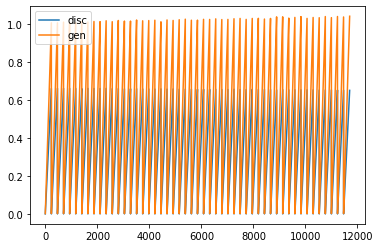

In [0]:
plt.plot(d_losses,label='disc')
plt.plot(g_losses,label='gen')
plt.legend()
plt.show()

In [0]:
for i in range(len(d_losses)):
  d_losses[i]=d_losses[i]/NO_OF_BATCHES
  g_losses[i]=g_losses[i]/NO_OF_BATCHES

In [0]:
print(d_losses)

[0.002806453623323359, 0.0027794730968964407, 0.00288376568729042, 0.002898392259565174, 0.0027453853533818172, 0.002927873124424209, 0.0029021498993930654, 0.00294790028506874, 0.0027580890390608045, 0.002801224461987487, 0.0028843644083055677, 0.00279115331478608, 0.0028321125313767, 0.0028569546774921254, 0.0028977014570154697, 0.002755359706715641, 0.0028167449765735203, 0.0028617666063145693, 0.0029596868488523695, 0.0028224894378939248, 0.002857686107994145, 0.0028731410319988546, 0.002803247199099288, 0.002886042890385685, 0.002914303260990697, 0.002856669517663809, 0.0027288244320796086, 0.0029064730191842103, 0.002823180240443629, 0.0029057516501500057, 0.0029792835315068564, 0.0028692217718841685, 0.0029484681848786836, 0.002809606810920259, 0.0027827400172877517, 0.002791407908129896, 0.002897261554359371, 0.0028057179899297208, 0.0028336630163029726, 0.002879040236147041, 0.0028580690805728617, 0.002915239741659572, 0.0028114055211727437, 0.002786004645192725, 0.00277471669

In [0]:
print(g_losses)

[0.004173667512388311, 0.004310437756725865, 0.0040431124532324635, 0.004164025824294131, 0.004298416977254753, 0.00439248227665567, 0.004078203286880102, 0.004195732693386893, 0.004252162244584825, 0.004135711580260187, 0.0042313958844567975, 0.004186691381992438, 0.004151341752109365, 0.004023812010756925, 0.004209467997917762, 0.0041817365548549555, 0.004217550031140319, 0.004217338358235155, 0.004128920471566355, 0.004366508915893033, 0.004282949317214835, 0.004353549235906356, 0.004274245510753403, 0.004247061717204559, 0.004097543211064787, 0.004202893401822473, 0.004402358817239093, 0.004383506937923594, 0.004298879550053523, 0.004317063551682692, 0.0041536719371110965, 0.004120308364558424, 0.004401005231417143, 0.004497764966426752, 0.004340530970157721, 0.0043418825182140386, 0.0041003359688652884, 0.004025502082629082, 0.004032184935023642, 0.004231236429295988, 0.004365146160125732, 0.004109111097123887, 0.0043046825971358865, 0.004288928631024483, 0.004303089064410609, 0.0